Importing dataset

In [1]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [2]:
#Reading csv file and converting it in dataframe
ds= pd.read_csv("census_income.csv")
df=pd.DataFrame(ds)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Dataset in Dataframe format.
Classification Model

In [3]:
# Rows & Columns in dataset:

df.shape

(32560, 15)

Dataset has 32560 Rows and 15 Columns

In [4]:
# Datatype of dataset

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are 9 Object datatype and 6 numeric datatype.
Target label is 'Income' which is object type.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No null values and Count of data is 32560 in each column
Datatype: 9 are Object and 6 are int64 datatype

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null present

In [7]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

Age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt: [ 83311 215646 234721 ...  34066  84661 257302]
Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education_num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation: [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Ma

Columns Native country, Occupation, Workclass have ' ?' as a value.
Need to replace ' ?' with mode values of the respective columns.

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

15 columns present in the dataset 

# Data Pre-Processing:

## Filling " ?" data with mode values 

In [9]:
df['Workclass'].mode()

0     Private
dtype: object

mode value of Workclass is Private

In [10]:
df['Occupation'].mode()

0     Prof-specialty
dtype: object

mode value of Occupation is Prof-specialty

In [11]:
df['Native_country'].mode()

0     United-States
dtype: object

mode value of Native_country is United-States

In [12]:
# Filling '?' value in dataset with Nan Values:
df['Workclass']= df['Workclass'].replace(' ?','Private')
df['Occupation']=df['Occupation'].replace(' ?','Prof-specialty')
df['Native_country']=df['Native_country'].replace(' ?','United-States')

'?' value replaced and there are no blank values

# EDA: Data Analysis

In [13]:
#Importing plotting libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###  Plotting Target Label "Income"

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


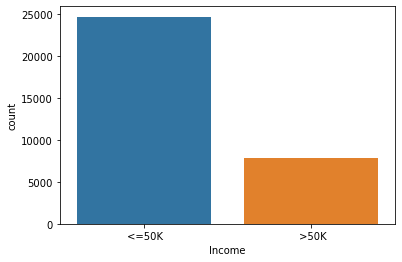

In [14]:
ax=sns.countplot(x="Income", data=df)
print(df["Income"].value_counts())

Count of people earning more than 50k is 7,841 and people earning less than and equal to 50k is 24719.
Class Imbalance present.

## Plotting of Numeric Datatype:

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

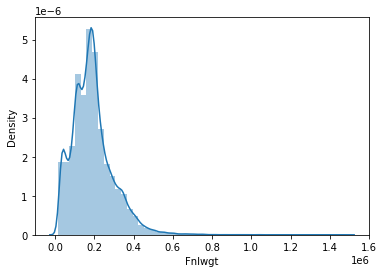

In [15]:
sns.distplot(df['Fnlwgt'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

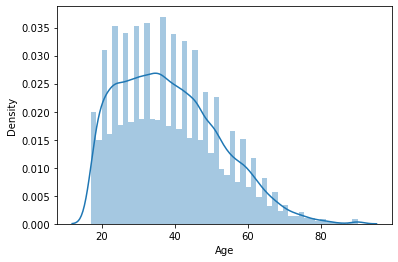

In [16]:
sns.distplot(df['Age'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

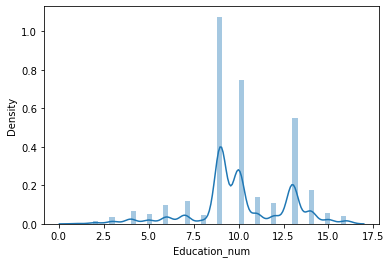

In [17]:
sns.distplot(df['Education_num'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

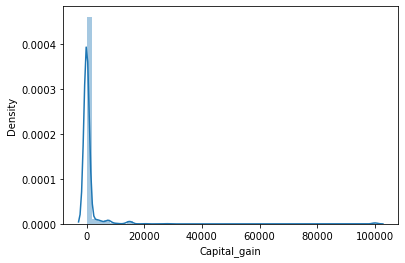

In [18]:
sns.distplot(df['Capital_gain'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

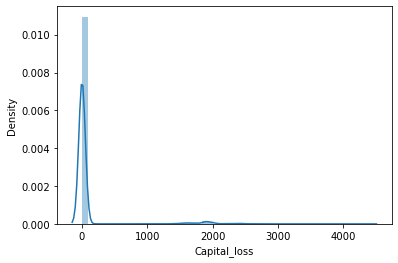

In [19]:
sns.distplot(df['Capital_loss'], kde=True) 

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

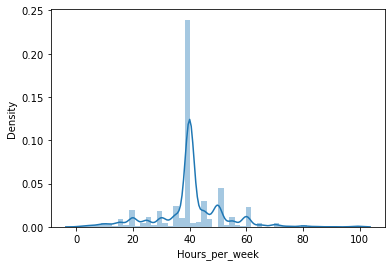

In [20]:
sns.distplot(df['Hours_per_week'], kde=True)

Data is not equally distributed and has skewness

## Plotting Object datatype

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


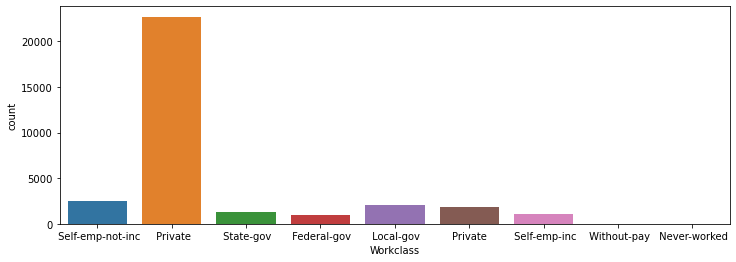

In [21]:
plt.figure(figsize=(12,4))
ax=sns.countplot(x="Workclass", data=df)
print(df["Workclass"].value_counts())

Maximum workclasss are in Private sector , without-pay and never-worked count is minimum.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


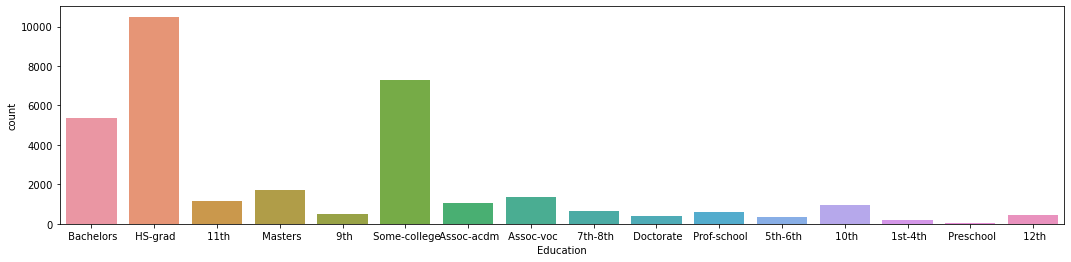

In [22]:
plt.figure(figsize=(18,4))
ax=sns.countplot(x="Education", data=df)
print(df["Education"].value_counts())

Maximum people have completed HS grad and then Some-college.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


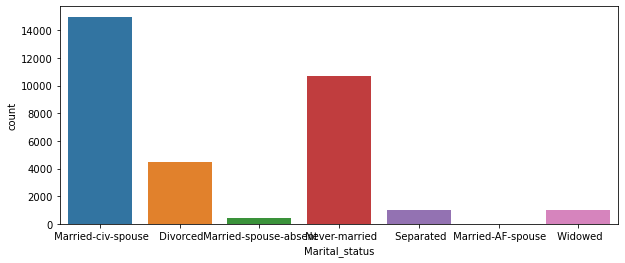

In [23]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x="Marital_status", data=df)
print(df["Marital_status"].value_counts())

Married-civ-spouse have higher count and after that its Never-married.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Prof-specialty        1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


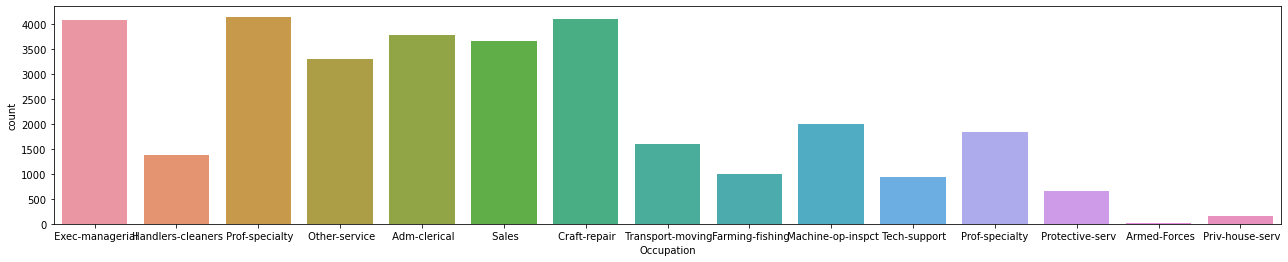

In [24]:
plt.figure(figsize=(22,4))
ax=sns.countplot(x="Occupation", data=df)
print(df["Occupation"].value_counts())

Prof-specialty have higher counts which is 4140.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


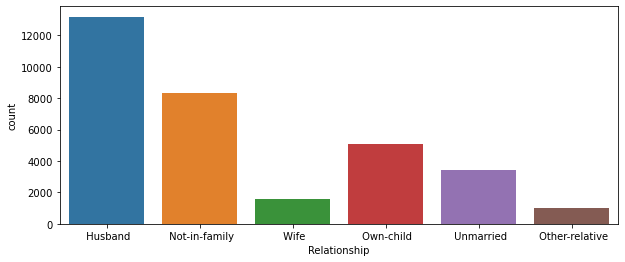

In [25]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x="Relationship", data=df)
print(df["Relationship"].value_counts())

Husband has higher count of 13193 and count of wife is 1568 which is less.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


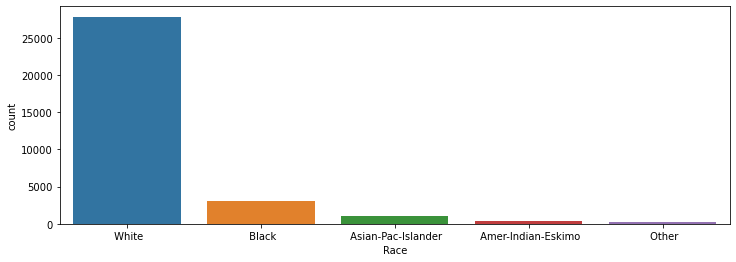

In [26]:
plt.figure(figsize=(12,4))
ax=sns.countplot(x="Race", data=df)
print(df["Race"].value_counts())

White race people are more in count which is 27815.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


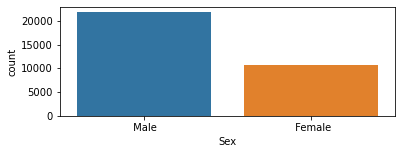

In [27]:
plt.figure(figsize=(6,2))
ax=sns.countplot(x="Sex", data=df)
print(df["Sex"].value_counts())

Maximum poeple working are Male which is 21789.

 United-States                 29169
 Mexico                          643
United-States                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

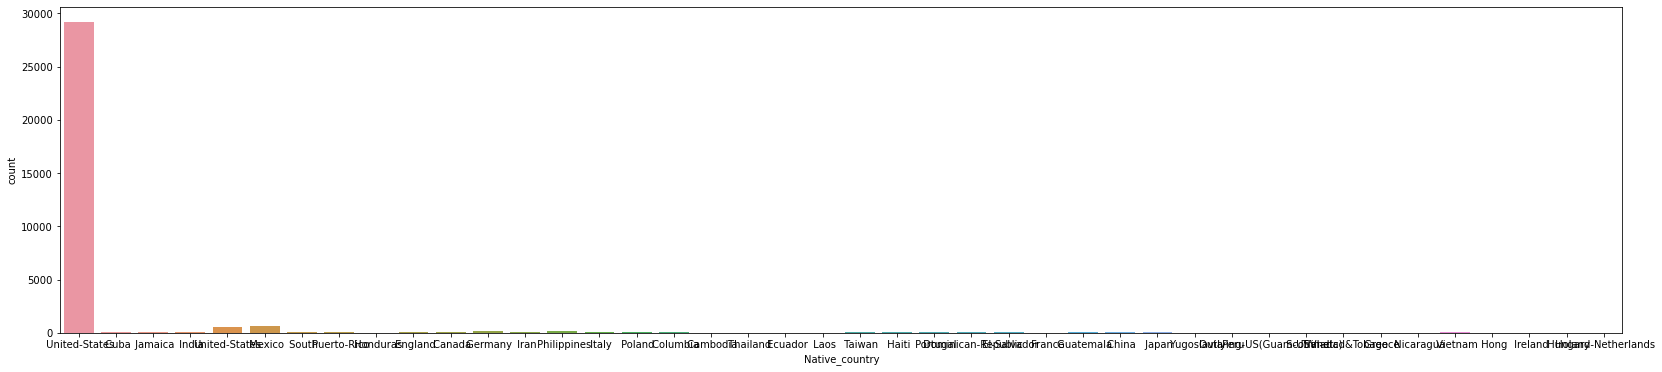

In [28]:
plt.figure(figsize=(28,6))
ax=sns.countplot(x="Native_country", data=df)
print(df["Native_country"].value_counts())

Maximum poeple are from United States as its count is more than other countries.

<AxesSubplot:xlabel='count', ylabel='Occupation'>

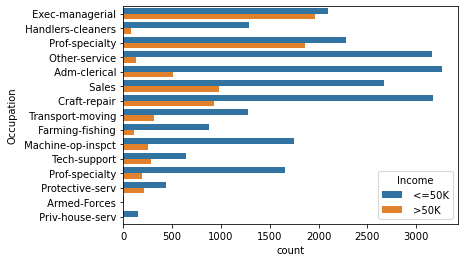

In [29]:
sns.countplot(y='Occupation', hue='Income', data = df)

People earning <=50K are working as Adm-clerical , other services and  Craft-repair.
People earning >50K are working as Exec-Managerial and Prof-speciality.

<AxesSubplot:xlabel='count', ylabel='Education_num'>

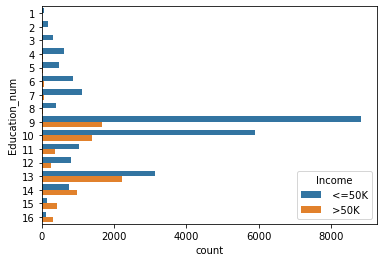

In [30]:
sns.countplot(y='Education_num', hue='Income', data = df)

People earning <=50K have Education_num as 9 
People earning >50K have Education_num as 13

<AxesSubplot:xlabel='count', ylabel='Sex'>

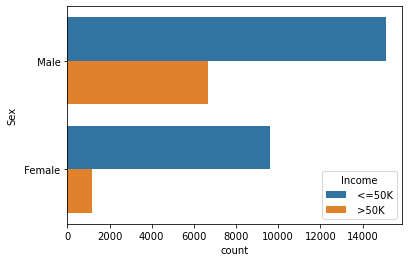

In [31]:
sns.countplot(y='Sex', hue='Income', data = df)

People earning <=50K have male in higer count
People earning >50K have male in higer count

<AxesSubplot:xlabel='Count', ylabel='Age'>

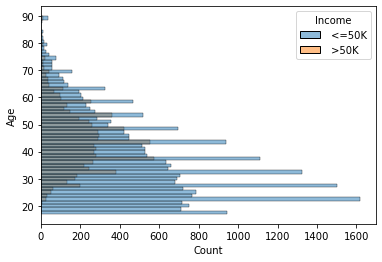

In [32]:
sns.histplot(y='Age', hue='Income', data = df)

People earning <=50K are in age group between 20 to 30
People earning >50K are in age group between 30 to 40

<AxesSubplot:xlabel='count', ylabel='Relationship'>

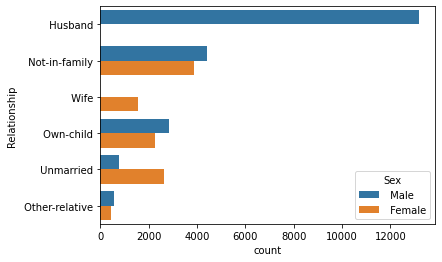

In [33]:
sns.countplot(y='Relationship', hue='Sex', data = df)

Maximum Male are Husband and maximum female are Not in Family.

## Label Encoding

In [34]:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [35]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


Encoded object to numeric datatype

## Using SMOTE for Class Imbalance:

In [36]:
import sklearn
!pip install scikit-learn
!pip install -U imbalanced-learn

In [37]:
# SMOTE method :
from imblearn.over_sampling import SMOTE
dx=df.drop(['Income'], axis=1)
dy=df['Income'].values
smt=SMOTE()
trainx,trainy=smt.fit_resample(dx,dy)

SMOTE Technique helped to balance the target class.

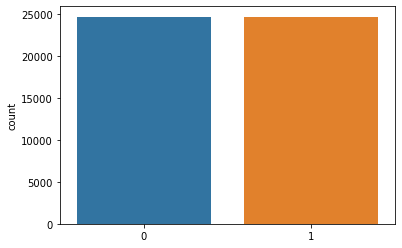

In [38]:
ax=sns.countplot(trainy)

Class Imbalance is corrected.

In [39]:
Income=pd.DataFrame(trainy)
Income.value_counts()

0    24719
1    24719
dtype: int64

Now count is 24719 for both the vaule of 0 and 1.

In [40]:
# Adding New value of Loan_Status in the df dataset as Attritions
df['Incomes']=Income
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Incomes
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,0


New column named Incomes is added

## Dropping old value of Income

In [41]:
df.drop(['Income'],axis=1,inplace=True)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Incomes
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


Dropped Income column.

## Describing the dataset

In [42]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Incomes
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.376290,1.897818e+05,10.298249,10.080590,2.611794,6.421959,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.470823,0.240817
std,13.640642,1.581995,1.055498e+05,3.870317,2.572709,1.506225,4.328539,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.083180,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Key Observations:

    1. Mean and Median: Values of mean and median are higher and lower for both so skewness is present. 
    2. 75% percentile and max: Age,Workclass,Fnlwgt,Education,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week and Native_country have outliers
    3. Standard deviation is less than mean so high peak data

<AxesSubplot:>

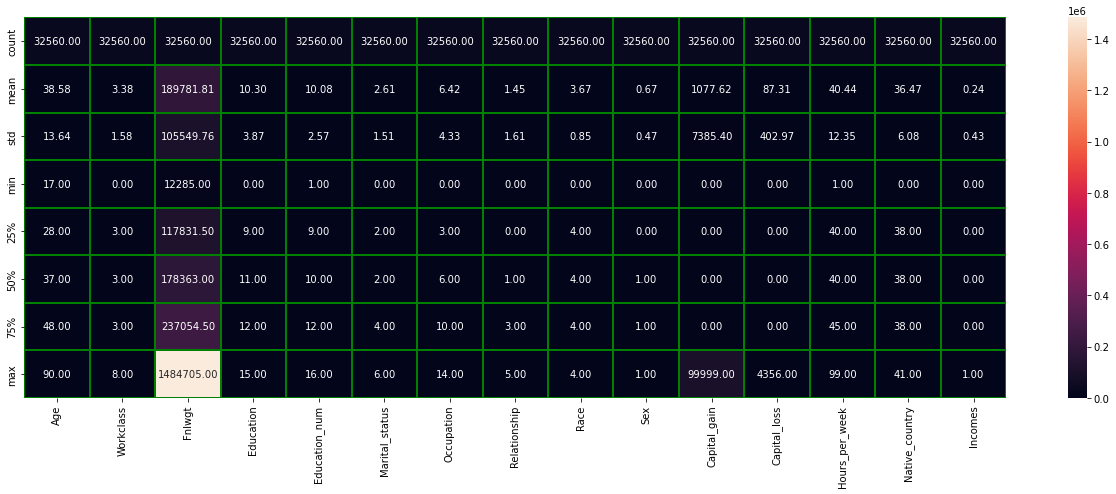

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description

## Outliers:

Age                  AxesSubplot(0.125,0.816017;0.352273x0.0639831)
Workclass         AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
Fnlwgt               AxesSubplot(0.125,0.739237;0.352273x0.0639831)
Education         AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
Education_num        AxesSubplot(0.125,0.662458;0.352273x0.0639831)
Marital_status    AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
Occupation           AxesSubplot(0.125,0.585678;0.352273x0.0639831)
Relationship      AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
Race                 AxesSubplot(0.125,0.508898;0.352273x0.0639831)
Sex               AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
Capital_gain         AxesSubplot(0.125,0.432119;0.352273x0.0639831)
Capital_loss      AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
Hours_per_week       AxesSubplot(0.125,0.355339;0.352273x0.0639831)
Native_country    AxesSubplot(0.547727,0.355339;0.352273x0.0639831)
Incomes              AxesSubplot(0.125,0.278559;

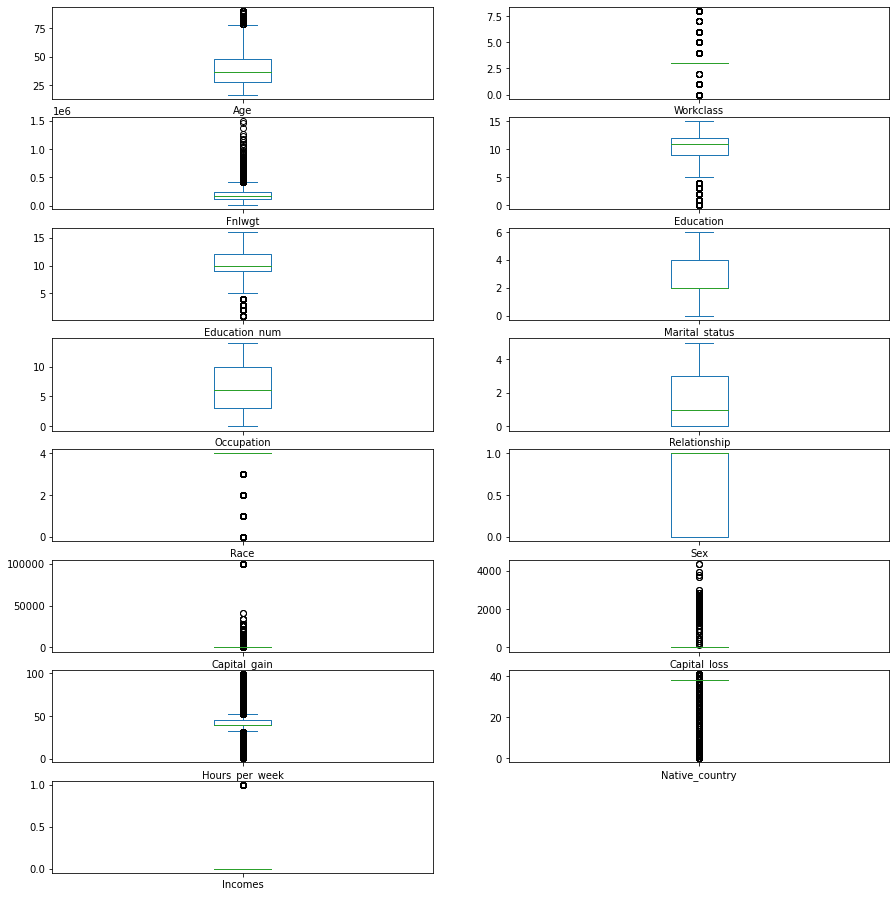

In [44]:
#Outliers:

df.plot(kind='box',subplots=True,layout=(10,2),figsize=(15,20))

Age,Workclass,Fnlwgt,Education,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week and Native_country have outliers

In [45]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [46]:
#removing value greater than threshold value 

df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Incomes
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Outliers removed.

In [47]:
df=df_new

In [48]:
df.shape

(27783, 15)

Rows: 27783, Columns: 15

### Percentage Loss of data

In [49]:
Data_loss=((32560-27783)/32560)*100
Data_loss

14.67137592137592

14.67% data lost

## Correlation of the columns with the target columns:

In [50]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Incomes
Age,1.000000,0.042922,-0.077599,-0.004169,0.044412,-0.286278,0.006079,-0.270166,0.020938,0.089335,0.132382,0.023449,0.090928,0.035239,0.241315
Workclass,0.042922,1.000000,-0.017788,-0.020164,-0.060449,0.045782,0.308538,0.013567,0.032434,0.003105,-0.010394,-0.008177,-0.101597,0.005190,-0.060329
Fnlwgt,-0.077599,-0.017788,1.000000,-0.021373,-0.039536,0.029752,-0.001255,0.014884,-0.102281,0.023202,-0.003621,0.003219,-0.018334,-0.103214,-0.011593
Education,-0.004169,-0.020164,-0.021373,1.000000,0.346929,-0.037125,-0.047034,-0.009196,0.026610,-0.031748,0.026581,-0.000335,0.058818,0.089093,0.070899
Education_num,0.044412,-0.060449,-0.039536,0.346929,1.000000,-0.058534,0.045515,-0.092873,0.082749,0.003945,0.157588,0.007352,0.155772,0.149067,0.319511
Marital_status,-0.286278,0.045782,0.029752,-0.037125,-0.058534,1.000000,0.054493,0.184104,-0.084671,-0.126149,-0.069569,-0.016479,-0.196905,-0.029891,-0.194068
Occupation,0.006079,0.308538,-0.001255,-0.047034,0.045515,0.054493,1.000000,-0.016552,-0.003834,0.030027,0.002079,-0.004665,-0.064224,0.019637,0.008354
Relationship,-0.270166,0.013567,0.014884,-0.009196,-0.092873,0.184104,-0.016552,1.000000,-0.146470,-0.576884,-0.090011,0.030263,-0.263187,-0.012015,-0.247810
Race,0.020938,0.032434,-0.102281,0.026610,0.082749,-0.084671,-0.003834,-0.146470,1.000000,0.124862,0.031092,-0.000083,0.057038,0.014516,0.094940
Sex,0.089335,0.003105,0.023202,-0.031748,0.003945,-0.126149,0.030027,-0.576884,0.124862,1.000000,0.069931,-0.027436,0.237000,-0.007392,0.211493


correlation of input with target variable Income

<AxesSubplot:>

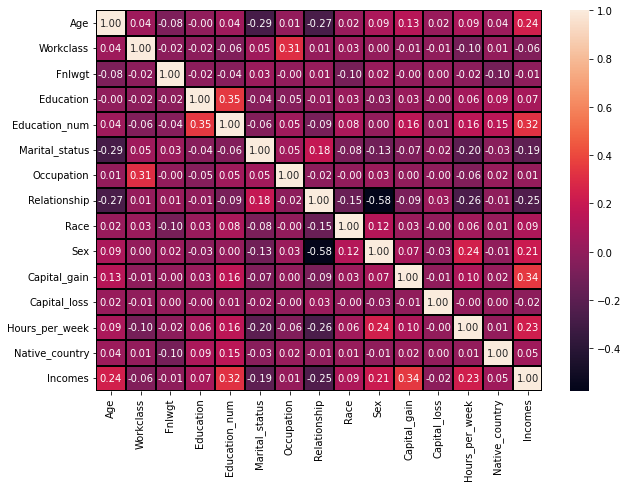

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:
 1. Income have positive correlation with Capital_gain and negative correlation with Relationship.
 2. Capital_gain has negative correlation with Relationship and positive correlation with Income.
 3. Multicollinearity exist

## Separating Target and feature variables

In [52]:
x = df.drop("Incomes",axis=1)
y = df["Incomes"]

### Multicollinearity removal using VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

VIF technique is used to remove Multicollinearity.

In [55]:
vif_calc()

    VIF Factor        features
0    10.297374             Age
1     6.221544       Workclass
2     4.725571          Fnlwgt
3     9.299643       Education
4    22.486158   Education_num
5     4.341209  Marital_status
6     3.539108      Occupation
7     2.932855    Relationship
8    36.703380            Race
9     4.533855             Sex
10    1.110906    Capital_gain
11    1.004038    Capital_loss
12   15.133703  Hours_per_week
13   80.734189  Native_country


Native_country,Race,Education_num, Hours_per_week and Age have higher VIF Factor

## Skewness:

In [56]:
x.skew()

Age                0.484815
Workclass          1.183376
Fnlwgt             0.627839
Education         -0.955830
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.752998
Race              -2.587270
Sex               -0.688841
Capital_gain       4.930962
Capital_loss      29.521477
Hours_per_week    -0.359723
Native_country    -5.179023
dtype: float64

Taking range of skewness between +/- 0.5
Capital_loss has higher skewness so need to remove it.

In [57]:
# Using power_transform to remove skewness.
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.92478243,  1.06127641, -1.12660978, ..., -0.04027807,
        -2.21494639,  0.04195581],
       [ 0.12842372, -0.14767017,  0.4130335 , ..., -0.04027807,
        -0.03973374,  0.04195581],
       [ 1.0995744 , -0.14767017,  0.59338805, ..., -0.04027807,
        -0.03973374,  0.04195581],
       ...,
       [ 1.37401089, -0.14767017, -0.24940364, ..., -0.04027807,
        -0.03973374,  0.04195581],
       [-1.32939791, -0.14767017,  0.27449645, ..., -0.04027807,
        -1.72163421,  0.04195581],
       [ 1.04221197,  0.4878625 ,  1.06427355, ..., -0.04027807,
        -0.03973374,  0.04195581]])

Used power_transform to remove skewness.

In [58]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

In [59]:
x.skew()

0     -0.018116
1      0.137669
2     -0.034501
3     -0.313405
4      0.026902
5     -0.128269
6     -0.203045
7      0.109542
8     -2.524683
9     -0.688841
10     3.068452
11    24.788464
12     0.105225
13     1.307405
dtype: float64

Still Column 8,11,13 has skewness so need to drop it.

## Data Cleaning:

In [60]:
x.drop([8,11,13],axis=1,inplace=True)
x.head()

,0,1,2,3,4,5,6,7,9,10,12
0,0.924782,1.061276,-1.126610,-0.489939,1.230081,-0.385370,-0.683150,-1.107778,0.713243,-0.297139,-2.214946
1,0.128424,-0.147670,0.413033,0.077604,-0.462835,-1.761318,-0.179076,0.105974,0.713243,-0.297139,-0.039734
2,1.099574,-0.147670,0.593388,-2.073703,-1.260785,-0.385370,-0.179076,-1.107778,0.713243,-0.297139,-0.039734
3,0.053370,-0.147670,1.035892,0.382569,1.670509,-0.385370,-0.683150,1.549604,-1.402047,-0.297139,-0.039734
4,0.864651,-0.147670,-0.157099,-1.225853,-2.018188,0.269233,0.261986,0.105974,-1.402047,-0.297139,-2.011186


Capital loss/ Column 11 dropped

## Scaling using Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.92478243,  1.06127641, -1.12660978, ...,  0.7132431 ,
        -0.29713927, -2.21494639],
       [ 0.12842372, -0.14767017,  0.4130335 , ...,  0.7132431 ,
        -0.29713927, -0.03973374],
       [ 1.0995744 , -0.14767017,  0.59338805, ...,  0.7132431 ,
        -0.29713927, -0.03973374],
       ...,
       [ 1.37401089, -0.14767017, -0.24940364, ..., -1.40204651,
        -0.29713927, -0.03973374],
       [-1.32939791, -0.14767017,  0.27449645, ...,  0.7132431 ,
        -0.29713927, -1.72163421],
       [ 1.04221197,  0.4878625 ,  1.06427355, ..., -1.40204651,
         3.36546266, -0.03973374]])

Scaling of feature label done.

# Model Selection:


## Logistic Regression:

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [63]:
l=[]
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    # 
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(train_y,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(test_y,pred_test)*100)
        l.append(i)

At random state 0 The model performs very well
At random state:- 0
Training r2_score is:- 82.9209034464141
Testing r2_score is:- 82.86845420190751
At random state 3 The model performs very well
At random state:- 3
Training r2_score is:- 82.91190497615405
Testing r2_score is:- 82.92244016555695
At random state 24 The model performs very well
At random state:- 24
Training r2_score is:- 82.94789885719428
Testing r2_score is:- 82.94043548677344
At random state 27 The model performs very well
At random state:- 27
Training r2_score is:- 83.04688203005489
Testing r2_score is:- 82.99442145042289
At random state 32 The model performs very well
At random state:- 32
Training r2_score is:- 82.96589579771438
Testing r2_score is:- 82.95843080798993
At random state 41 The model performs very well
At random state:- 41
Training r2_score is:- 82.94789885719428
Testing r2_score is:- 82.85045888069102
At random state 64 The model performs very well
At random state:- 64
Training r2_score is:- 83.0153873841

At random state 649 The model performs very well
At random state:- 649
Training r2_score is:- 83.00188967875461
Testing r2_score is:- 83.03041209285585
At random state 656 The model performs very well
At random state:- 656
Training r2_score is:- 82.98839197336453
Testing r2_score is:- 82.95843080798993
At random state 703 The model performs very well
At random state:- 703
Training r2_score is:- 82.9523980923243
Testing r2_score is:- 83.03041209285585
At random state 707 The model performs very well
At random state:- 707
Training r2_score is:- 83.00188967875461
Testing r2_score is:- 82.9764261292064
At random state 708 The model performs very well
At random state:- 708
Training r2_score is:- 82.90290650589401
Testing r2_score is:- 82.85045888069102
At random state 717 The model performs very well
At random state:- 717
Training r2_score is:- 82.94789885719428
Testing r2_score is:- 82.94043548677344
At random state 721 The model performs very well
At random state:- 721
Training r2_score i

In [64]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=968)

In [65]:
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      4315
           1       0.23      0.15      0.18      1242

    accuracy                           0.70      5557
   macro avg       0.50      0.50      0.50      5557
weighted avg       0.65      0.70      0.67      5557



Classification report is printed

In [66]:
pred_lr=lr.predict(test_x)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(test_y,pred_lr)

for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-", lsc*100)
    print("Accuracy score is:-", lss*100)

At cv:- 2
Cross validation score is:- 82.92841163927707
Accuracy score is:- 82.94043548677344
At cv:- 3
Cross validation score is:- 82.9032141957312
Accuracy score is:- 82.94043548677344
At cv:- 4
Cross validation score is:- 82.90321387015787
Accuracy score is:- 82.94043548677344
At cv:- 5
Cross validation score is:- 82.95720456093943
Accuracy score is:- 82.94043548677344
At cv:- 6
Cross validation score is:- 82.92121411111987
Accuracy score is:- 82.94043548677344
At cv:- 7
Cross validation score is:- 82.96080336896664
Accuracy score is:- 82.94043548677344
At cv:- 8
Cross validation score is:- 82.93200836837433
Accuracy score is:- 82.94043548677344
At cv:- 9
Cross validation score is:- 82.91401216571285
Accuracy score is:- 82.94043548677344


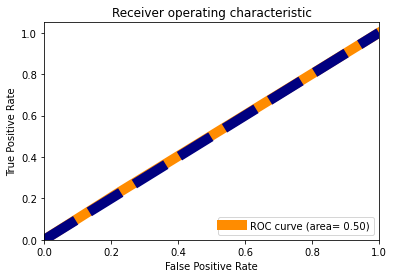

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred_test,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC Curve value is 50% so model is perforing well.

In [68]:
# GridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
alphav= {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid= GridSearchCV(estimator=model,param_grid=alphav)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.26930490152276987
1
{'alpha': 1}


In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
print('lr score:',lr.score(train_x,train_y))
rd=Ridge(alpha=1)
rd.fit(train_x,train_y)
print('Score:', rd.score(train_x,train_y))
print(rd.coef_)
print('Score:', rd.score(train_x,train_y))

lr score: 0.8300188967875461
Score: 0.27003597426492065
[ 0.05213561 -0.01569948  0.00814148 -0.00934286  0.1094236  -0.02218458
  0.00540098 -0.0762789   0.02052691  0.07559181  0.03559666]
Score: 0.27003597426492065


## Decision Tree classifier

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
grid_param={
    'criterion':['gini','entropy']
  }
gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)
gd_sr.fit(train_x,train_y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

print(round(best_result,2))

{'criterion': 'entropy'}
0.8089171849470234
0.81


Best parameters for DecisionTreeClassifier

In [71]:
dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)

0.9999550076486997

In [72]:
dtscore = cross_val_score(dtc,x,y,cv=9)
dts = dtscore.mean()
print('Cross Val Score:',dts*100)

Cross Val Score: 80.8156066659468


Cross Val Score: 80.89 %

In [73]:
#Predicted value
pred = dtc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion= confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.8029512326795033
Confusion Matrix:  [[3742  573]
 [ 522  720]]


Accuracy of Decision Tree Classifier model is 80.29%

## SVM(SVC)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf= GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


Best parameters for SVC

In [76]:
sv=svm.SVC(kernel='rbf',C=10)
sv.fit(train_x,train_y)
sv.score(train_x,train_y)

0.8602537568613335

SV Score: 86%

In [77]:
#Predicted value
pred = sv.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.8412812668706137
Confusion Matrix:  [[4024  291]
 [ 591  651]]


Accuracy of the model is:84.1%

In [78]:
svscore = cross_val_score(sv,x,y,cv=9)
svs = svscore.mean()
print('Cross Val Score:',svs*100)

Cross Val Score: 84.03340172047655


Cross Val Score: 84.03%

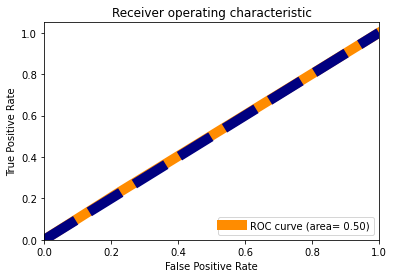

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred_test,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## RandomForestClassifier

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

KeyboardInterrupt: 

Best parameters for RandomForestClassifier 

In [ ]:
rfc= RandomForestClassifier(max_depth=11,max_features=2)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)

In [ ]:
#Predicted value
pred = rfc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is: 75%

In [ ]:
rfscore = cross_val_score(rfc,x,y,cv=9)
rfs = rfscore.mean()
print('Cross Val Score:',rfs*100)

Cross Val Score:81.11%

## 4. KNeighbors Classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

knc=KNeighborsClassifier()

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }

clf = GridSearchCV(knc, parameters, cv=9, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


Best parameters for KNeighborsClassifier

In [83]:
knc= KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='uniform')
knc.fit(train_x,train_y)
knc.score(train_x,train_y)

0.8623683973724466

In [84]:
#Predicted value
pred = knc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.8326435126867014
Confusion Matrix:  [[3909  406]
 [ 524  718]]


Accuracy of the model is: 83.2%

In [85]:
knscore = cross_val_score(knc,x,y,cv=7)
kns = knscore.mean()
print('Cross Val Score:',kns*100)

Cross Val Score: 83.30633840837922


Cross Val Score: 83.3%

## Best Model is SVC as it has Accuracy of 84.12% and Cross val score of 84.03%

# Model saving:

In [90]:
import pickle
filename = 'Census_Income.pkl'
pickle.dump(sv, open(filename, 'wb'))

## Accuracy:

In [91]:
loaded_model = pickle.load(open('Census_Income.pkl', 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.8412812668706137


Accuracy of 84.1% so model performing well

## Conclusion:

In [92]:
import numpy as np
a=np.array(test_y)
pred_decision =np.array(sv.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": pred},index=range(len(a)))
df_com

,original,predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
5552,0,0
5553,1,1
5554,0,0
5555,0,0


Model is able to predict values quite accurately.